In [93]:
print('What\'s popping! :)')

What's popping! :)


## Notebook Imports 

In [94]:
from os import walk 
from os.path import join 
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import nltk 
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split

from bs4 import BeautifulSoup
from wordcloud import WordCloud
from PIL import Image
%matplotlib inline


## Constants

In [95]:
EXAMPLE_FILE = '/home/goodluck/Desktop/Data/Classification/SpamData/01_Processing/practice_email.txt'
SPAM_1_PATH = '/home/goodluck/Desktop/Data/Classification/SpamData/01_Processing/spam_assassin_corpus/spam_1'
SPAM_2_PATH = '/home/goodluck/Desktop/Data/Classification/SpamData/01_Processing/spam_assassin_corpus/spam_2'
EASY_NOSPAM_1_PATH = '/home/goodluck/Desktop/Data/Classification/SpamData/01_Processing/spam_assassin_corpus/easy_ham_1'
EASY_NOSPAM_2_PATH = '/home/goodluck/Desktop/Data/Classification/SpamData/01_Processing/spam_assassin_corpus/easy_ham_1'

SPAM_CAT = 1
HAM_CAT = 0
VOCAB_SIZE = 2500

TRAINING_DATA_FILE = '/home/goodluck/Desktop/Data/Classification/training-data.txt'
TEST_DATA_FILE = '/home/goodluck/Desktop/Data/Classification/test-data.txt'

WORD_ID_FILE = '/home/goodluck/Desktop/Data/Classification/word-by-id.csv'
DATA_JSON_FILE = '/home/goodluck/Desktop/Data/Classification/email-text-data.json'
WHALE_FILE = '/home/goodluck/Desktop/Data/Classification/whale_PNG19259.png'
THUMBS_UP_FILE = '/home/goodluck/Desktop/Data/Classification/thumbs-up.png'
THUMBS_DOWN_FILE = '/home/goodluck/Desktop/Data/Classification/thumbs-down.png'

In [96]:
stream = open(EXAMPLE_FILE, encoding='latin-1')

is_body = False
lines = []

for line in stream:
    if is_body:
        lines.append(line)
    elif line =='\n':
        is_body = True
        
stream.close()

email_body = '\n'.join(lines)
print(email_body)
print(lines[0])

                     
                     
                     
                     



Dear Mr Still



Good tidings to you and all your staff for the festive season ahead (Christmas).

Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa's Grotto" in your store.

But WAIT! You're probably thinking: "What makes him so special?"

Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.

You will note also, from the enclosed sketch, that I have radically redesigned Santa's outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.

I look forward to hearing from you.



Best wishes

Robin Cooper

[Excerpt from the book: The Timewaster Let

In [97]:
def generator_squares(N):
    for my_number in range(N):
        yield my_number **2

## Generator Function 

In [98]:
for i in generator_squares(3):
    print(i, end='-->')

0-->1-->4-->

## E-mail Body Extraction

In [99]:
def email_body_generator (path):
    for root, dirnames, filenames in walk(path):
        for file_name in filenames:
            filepath = join(root, file_name)
            stream = open(filepath, encoding='latin-1')
            is_body = False
            lines = []

            for line in stream:
                if is_body:
                    lines.append(line)
                elif line =='\n':
                    is_body = True
            

            stream.close()
            email_body = '\n'.join(lines)
            yield file_name, email_body

In [100]:
def df_from_directory(path, classification):
    rows = []
    row_name=[]
    
    for file_name, email_body in email_body_generator(path):
        rows.append({'MESSAGE': email_body, 'CATEGORY': classification})
        row_name.append(file_name)
        
    return pd.DataFrame(rows, index=row_name)

In [101]:
spam_emails = df_from_directory(SPAM_1_PATH, SPAM_CAT)
spam_emails = spam_emails.append(df_from_directory(SPAM_2_PATH, SPAM_CAT))
spam_emails

,MESSAGE,CATEGORY
00395.f9df5b3574ef5ba6143c08a1fa301886,<html>\n\n\n\n<head>\n\n<title>Home Page</titl...,1
00242.e030c8b1f053037aeffb062f3a34b523,\n\nDear Sir or Madam\n\n\n\nIn the past you h...,1
00470.32f31d3d1598f840a6471fa25332336d,<body topmargin=0 leftmargin=0><TABLE cellSpac...,1
00130.c8128e89eff5b0e61aa864ebfd96afba,<!-- saved from url=(0022)http://internet.e-ma...,1
00451.5af88ff99e71a8984ac293c250b37d34,<HTML>\n\n<BODY>\n\n</head>\n\n\n\n<body bgcol...,1
...,...,...
00281.d5147756d766fba6dbc649f786e38bc2,<HTML>\n\n<body bgcolor=#FFFFFF>\n\n<font colo...,1
00717.835c303709346693354e01b242ff22da,<style type=text/css>\n\na { text-decoration: ...,1
00698.d754f7a62c2f8ce3f331e59ee0978205,"<html>\n\n\n\n<head>\n\n<meta http-equiv=3D""Co...",1
00462.d0ca75a85184ca9843d1dffdc8c98855,"<html>\n\n<head>\n\n <meta http-equiv=""Conte...",1


In [102]:
spam_emails.shape

(1898, 2)

In [103]:
ham_emails = df_from_directory(EASY_NOSPAM_1_PATH, HAM_CAT)
ham_emails = ham_emails.append(df_from_directory(EASY_NOSPAM_2_PATH, HAM_CAT))
ham_emails

,MESSAGE,CATEGORY
02489.85c20a6f9d75714d9f44398baeddd416,Joe McNally writes:\n\n\n\n> What the hell is ...,0
01354.8a0699778c705d4f2fbc6f611c11bd05,"To update spamassasin, all I need to do is ins...",0
00191.41a15d7d511bc977b0fcb93cd9492bd1,"> Ultimately, there was a big\n\n> disagreemen...",0
02094.52be9f01821142f5765e27d7da4d98c2,"URL: http://www.newsisfree.com/click/-2,841882...",0
00385.c874a33cb7def0721807ea870e3c31c8,Sunday I drove from Portland down to the Woodb...,0
...,...,...
01171.bc028721505534967b4371da24b1e042,"Date: Fri, 23 Aug 2002 02:05:19 +07...",0
02361.68fa77659ad7611f8bcad48d030a3039,URL: http://boingboing.net/#85534171\n\nDate: ...,0
00975.23aa3095e145bf342502ee60bc602c28,This is a multi-part message in MIME format.\n...,0
01102.d178bf64121423fea27fcbf754d5f984,"On Thu, Feb 07, 2002 at 12:29:14AM +0200, Pete...",0


In [104]:
ham_emails.shape

(5002, 2)

In [105]:
data = pd.concat([spam_emails, ham_emails])
print('Shape of the entire daaframe is:', data.shape)
data.head()
data.tail()

Shape of the entire daaframe is: (6900, 2)


,MESSAGE,CATEGORY
01171.bc028721505534967b4371da24b1e042,"Date: Fri, 23 Aug 2002 02:05:19 +07...",0
02361.68fa77659ad7611f8bcad48d030a3039,URL: http://boingboing.net/#85534171\n\nDate: ...,0
00975.23aa3095e145bf342502ee60bc602c28,This is a multi-part message in MIME format.\n...,0
01102.d178bf64121423fea27fcbf754d5f984,"On Thu, Feb 07, 2002 at 12:29:14AM +0200, Pete...",0
00353.ec01b62420323fffe253643fe0439c86,"On Tue, 2002-08-27 at 08:58, Joseph S. Barrera...",0


## Data Cleaning: Checking for Missing Values

In [106]:
# Checking for is there is a empty values on the email's body
# data['MESSAGE']
data.MESSAGE.isnull().values.any()



False

In [107]:
type(data.MESSAGE.isnull().values)

numpy.ndarray

In [108]:
my_var = None

In [109]:
# check if there are any empty emails
(data.MESSAGE.str.len()==0).any()

True

In [110]:
(data.MESSAGE.str.len()==0).sum()

4

In [111]:
# Check for entries with Null or None values

## Locate the empty e-mails

In [112]:
data[data.MESSAGE.str.len()==0].index

Index(['cmds', 'cmds', 'cmds', 'cmds'], dtype='object')

## Remove System File Entries from DataFrame

In [113]:
data = data.drop('cmds')
data[data.MESSAGE.str.len()==0].index


Index([], dtype='object')

## Add Document IDs to Track E-mails in Dataset

In [114]:
document_id = range(0, len(data.index))
data['DOC_ID'] = document_id


In [115]:
data.DOC_ID

00395.f9df5b3574ef5ba6143c08a1fa301886       0
00242.e030c8b1f053037aeffb062f3a34b523       1
00470.32f31d3d1598f840a6471fa25332336d       2
00130.c8128e89eff5b0e61aa864ebfd96afba       3
00451.5af88ff99e71a8984ac293c250b37d34       4
                                          ... 
01171.bc028721505534967b4371da24b1e042    6891
02361.68fa77659ad7611f8bcad48d030a3039    6892
00975.23aa3095e145bf342502ee60bc602c28    6893
01102.d178bf64121423fea27fcbf754d5f984    6894
00353.ec01b62420323fffe253643fe0439c86    6895
Name: DOC_ID, Length: 6896, dtype: int64

In [116]:
data['FILE_NAME'] = data.index
data.set_index('DOC_ID', inplace = True)
data.head()
data.tail()

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
6891,"Date: Fri, 23 Aug 2002 02:05:19 +07...",0,01171.bc028721505534967b4371da24b1e042
6892,URL: http://boingboing.net/#85534171\n\nDate: ...,0,02361.68fa77659ad7611f8bcad48d030a3039
6893,This is a multi-part message in MIME format.\n...,0,00975.23aa3095e145bf342502ee60bc602c28
6894,"On Thu, Feb 07, 2002 at 12:29:14AM +0200, Pete...",0,01102.d178bf64121423fea27fcbf754d5f984
6895,"On Tue, 2002-08-27 at 08:58, Joseph S. Barrera...",0,00353.ec01b62420323fffe253643fe0439c86


##  Save To Files Using Pandas

In [117]:
data.to_json(DATA_JSON_FILE)

# Visualization 

### 1. Number of spam messages visualized

In [118]:
data.CATEGORY.value_counts()

0    5000
1    1896
Name: CATEGORY, dtype: int64

In [119]:
number_of_spam = data.CATEGORY.value_counts()[1]
number_of_ham = data.CATEGORY.value_counts()[0]

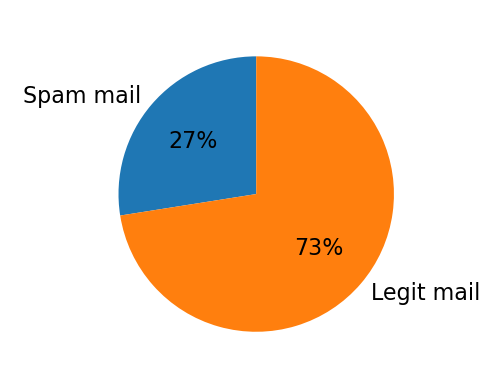

In [120]:
category_names = ['Spam mail', 'Legit mail']
size = [number_of_spam, number_of_ham]

plt.figure(figsize = (2,2), dpi=228)
plt.pie(size, labels=category_names, textprops={'fontsize':7}, startangle=90, 
       autopct='%1.0f%%')
plt.show()

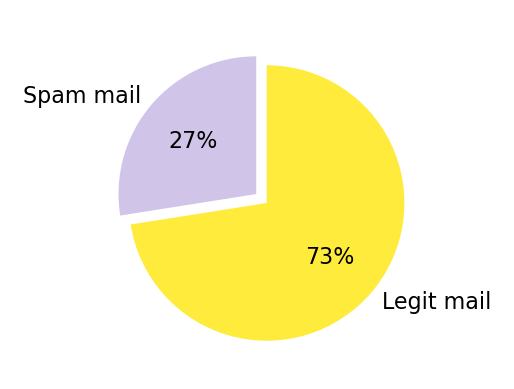

In [121]:
category_names = ['Spam mail', 'Legit mail']
size = [number_of_spam, number_of_ham]
custom_color = ['#D1C4E9', '#FFEB3B']

plt.figure(figsize = (2,2), dpi=228)
    
plt.pie(size, labels=category_names, textprops={'fontsize':7}, startangle=90, 
       autopct='%1.0f%%', colors= custom_color, explode = [0, 0.1])
plt.show()

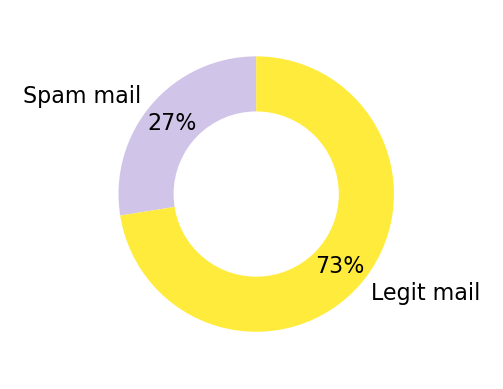

In [122]:
category_names = ['Spam mail', 'Legit mail']
size = [number_of_spam, number_of_ham]
custom_color = ['#D1C4E9', '#FFEB3B']

plt.figure(figsize = (2,2), dpi=228)
    
plt.pie(size, labels=category_names, textprops={'fontsize':7}, startangle=90, 
       autopct='%1.0f%%', colors= custom_color,  pctdistance=0.8)

# Drawing a circle
centre_circle = plt.Circle((0,0), radius=0.6, fc='white', )
plt.gca().add_artist(centre_circle)
plt.show()

## Natural Language Processing

In [123]:
# converting to lower case

msg = 'All work and no play makes Jack a Bad Boy'
msg.lower()

'all work and no play makes jack a bad boy'

### Download the NLTK Resources (Tokenizer & Stopwords)

In [124]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/goodluck/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [125]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/goodluck/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [126]:
nltk.download('gutenberg')
nltk.download('shakespeare')

[nltk_data] Downloading package gutenberg to
[nltk_data]     /home/goodluck/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package shakespeare to
[nltk_data]     /home/goodluck/nltk_data...
[nltk_data]   Package shakespeare is already up-to-date!


True

### Tokenizer 

In [127]:
msg = 'All work and no play makes Jack a Bad Boy'
word_tokenize(msg.lower())

['all', 'work', 'and', 'no', 'play', 'makes', 'jack', 'a', 'bad', 'boy']

### Remove stop words

In [128]:
stop_words = set(stopwords.words('english'))
type(stop_words)

set

In [129]:
if 'this' in stop_words: print('found it') 
    

found it


In [130]:
if 'hello' not in stop_words: print('nope not there') 

nope not there


In [131]:
msg = 'All work and no play makes Jack a Bad Boy to be or not be '
words = word_tokenize(msg.lower())

filtered_words = []

for word in words:
    if word not in stop_words:
        filtered_words.append(word)
        
        
print(filtered_words)

['work', 'play', 'makes', 'jack', 'bad', 'boy']


## Word Stemming and Stemming

In [132]:
msg = 'All work and no play makes Jack a Bad Boy to be or not be, nobody expects the spanish inguiziton'
words = word_tokenize(msg.lower())

filtered_words = []
stemmer = PorterStemmer()
for word in words:
    if word not in stop_words:
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)
        
        
print(filtered_words)

['work', 'play', 'make', 'jack', 'bad', 'boy', ',', 'nobodi', 'expect', 'spanish', 'inguiziton']


### Removing Punction 

In [133]:
msg = 'All work and no play makes Jack a Bad Boy to be or not be, nobody expects the spanish inguiziton. . '
words = word_tokenize(msg.lower())

filtered_words = []
stemmer = PorterStemmer()
for word in words:
    if word not in stop_words and word.isalpha():
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)
        
        
print(filtered_words)

['work', 'play', 'make', 'jack', 'bad', 'boy', 'nobodi', 'expect', 'spanish', 'inguiziton']


### Removing HTML tags

In [134]:
soup = BeautifulSoup(data.at[2, 'MESSAGE'], 'html.parser')
print(soup.prettify())

<body leftmargin="0" topmargin="0">
 <table border="0" cellpadding="0" cellspacing="0" width="537">
  <tbody>
   <tr>
    <td bgcolor="#d6cfab" style="FONT-SIZE: 12px; COLOR: black; FONT-FAMILY: 

Verdana, Tahoma, sans-serif" width="736">
     <div style="width: 620; 

height: 11">
      <span class="890164919-26062002">
       <font color="#0000ff" face="Arial" size="2">
       </font>
      </span>
     </div>
     <div>
      <span class="890164919-26062002">
       <font color="#0000ff" face="Arial" size="2">
       </font>
      </span>
     </div>
     <center>
      <table border="0" cellpadding="0" cellspacing="0" width="540">
       <tbody>
        <tr>
         <td style="FONT-SIZE: 12px; COLOR: black; 

FONT-FAMILY: Verdana, Tahoma, sans-serif">
          <img border="0" height="221" nosend="1" src="http://64.57.207.

12/messhead3.gif" width="540"/>
         </td>
        </tr>
        <tr>
         <td align="middle" bgcolor="white" style="FONT-SIZE: 12px; COLOR: black; FON

In [135]:
soup.get_text()

"\xa0\xa0\xa0\xa0\xa0\n\n Private Label \n\nReseller Hosting Plans\xa0Starter PlanMidsize \n\nPlanSuperSIZE PlanPrice\xa0\xa0 \n\n99.95/mo.259.95/mo.425.95/mo.\n\nDomains\xa0\xa0 75UnlimitedUnlimitedDisk Space\xa0\xa0 \n\n2X 500 Mb 2X 1GB2X 10 GBBandwidth\xa0\xa0 \n\n2X 15 GB2x 50 GB2X \n\n100GBBilling\xa0\xa0 750125\xa0  More Info  More Info \nMore \n\nInfoThat's \n\nright, we will DOUBLE these already huge amounts of Disk Space and Bandwidth: \n\nonly  Available until 9/30/2002 6 P.M. EST.\n\nThink this offer can't get any better? Think \n\nagain!\xa0 If you sign - up for a six (6) month hosting package,\xa0 we \n\nare going to give you 1 free month of service.We offer a 30 Day money back guarantee so this offer is \n\nabsolutely risk free. Come find out what it is like to host with a company \n\nthat has Real Live 24/7 Support and enough bandwidth to host the \n\nlargest web sites worldwide.Key \n\nFeatures of Reseller PlansAutomated \n\ncustomer signupAutomated domain registrationC

### Creating Pre-processing Functions

In [136]:
def clean_message(message, stemmer = PorterStemmer(), stop_words = set(stopwords.words('english'))):
    
    words = word_tokenize(message.lower())
    filtered_words = []
    
    for word in words:
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
    
    
    return filtered_words

In [137]:
clean_message(email_body)

['dear',
 'mr',
 'still',
 'good',
 'tide',
 'staff',
 'festiv',
 'season',
 'ahead',
 'christma',
 'crux',
 'fulli',
 'qualifi',
 'santa',
 'clau',
 'wonder',
 'whether',
 'might',
 'consid',
 'run',
 'santa',
 'grotto',
 'store',
 'wait',
 'probabl',
 'think',
 'make',
 'special',
 'well',
 'first',
 'made',
 'sever',
 'chang',
 'characteris',
 'father',
 'christma',
 'rather',
 'greet',
 'children',
 'shout',
 'ho',
 'ho',
 'ho',
 'prefer',
 'whisper',
 'phrase',
 'depend',
 'unfathom',
 'cruel',
 'world',
 'live',
 'addit',
 'gift',
 'rang',
 'felt',
 'hoop',
 'holder',
 'note',
 'also',
 'enclos',
 'sketch',
 'radic',
 'redesign',
 'santa',
 'outfit',
 'renam',
 'charact',
 'lord',
 'buckl',
 'would',
 'interest',
 'employ',
 'promis',
 'never',
 'let',
 'look',
 'forward',
 'hear',
 'best',
 'wish',
 'robin',
 'cooper',
 'excerpt',
 'book',
 'timewast',
 'letter',
 'robin',
 'cooper']

In [138]:
def clean_message_no_html(message, stemmer = PorterStemmer(), stop_words = set(stopwords.words('english'))):
    
   
    soup = BeautifulSoup(message, 'html.parser')
    cleaned_text = soup.get_text()
    words = word_tokenize(cleaned_text.lower())
    filtered_words = []
    
    for word in words:
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
    
    
    return filtered_words

In [139]:
clean_message_no_html(data.at[2, 'MESSAGE'])

['privat',
 'label',
 'resel',
 'host',
 'plan',
 'starter',
 'planmids',
 'plansupers',
 'planpric',
 'domain',
 'space',
 'mb',
 'gbbandwidth',
 'info',
 'info',
 'infothat',
 'right',
 'doubl',
 'alreadi',
 'huge',
 'amount',
 'disk',
 'space',
 'bandwidth',
 'avail',
 'est',
 'think',
 'offer',
 'ca',
 'get',
 'better',
 'think',
 'sign',
 'six',
 'month',
 'host',
 'packag',
 'go',
 'give',
 'free',
 'month',
 'offer',
 'day',
 'money',
 'back',
 'guarante',
 'offer',
 'absolut',
 'risk',
 'free',
 'come',
 'find',
 'like',
 'host',
 'compani',
 'real',
 'live',
 'support',
 'enough',
 'bandwidth',
 'host',
 'largest',
 'web',
 'site',
 'featur',
 'resel',
 'plansautom',
 'custom',
 'signupautom',
 'domain',
 'registrationcredit',
 'card',
 'processingrecurr',
 'invoicing',
 'autom',
 'includ',
 'linux',
 'oscomplet',
 'brandabl',
 'interfacemultilingu',
 'supportflex',
 'end',
 'user',
 'interfacecontrol',
 'panel',
 'walk',
 'provid',
 'techsshar',
 'dedic',
 'ipsdatabas',
 'hos

### Applying cleaning and Tokenization all e-mails

In [140]:
first_emails = data.MESSAGE.iloc[0:3]

In [141]:
nested_list = first_emails.apply(clean_message)

In [142]:
flat_list = []
for sublist in nested_list:
    for item in sublist:
        flat_list.append(item)


In [143]:
%%time
nested_list = data.MESSAGE.apply(clean_message_no_html)

/home/goodluck/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "http://www.post-gazette.com/columnists/20020905brian5
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


CPU times: user 40 s, sys: 40.3 ms, total: 40 s
Wall time: 40.1 s


In [144]:
nested_list

DOC_ID
0       [home, page, promot, reach, error, would, pref...
1       [dear, sir, madam, past, request, inform, disc...
2       [privat, label, resel, host, plan, starter, pl...
3       [winner, dear, travel, congratul, may, one, lu...
4       [fortun, liter, made, new, marketplac, billion...
                              ...                        
6891    [date, fri, aug, robert, elz, said, today, cv,...
6892    [url, http, date, suppli, art, letter, daili, ...
6893    [messag, mime, format, sign, conform, need, pg...
6894    [thu, feb, peter, peltonen, wrote, line, rpm, ...
6895    [tue, joseph, barrera, iii, wrote, c, reliabl,...
Name: MESSAGE, Length: 6896, dtype: object

### Using Logic to slice a dataframe

In [145]:
data[data.CATEGORY == 1].head()

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,<html>\n\n\n\n<head>\n\n<title>Home Page</titl...,1,00395.f9df5b3574ef5ba6143c08a1fa301886
1,\n\nDear Sir or Madam\n\n\n\nIn the past you h...,1,00242.e030c8b1f053037aeffb062f3a34b523
2,<body topmargin=0 leftmargin=0><TABLE cellSpac...,1,00470.32f31d3d1598f840a6471fa25332336d
3,<!-- saved from url=(0022)http://internet.e-ma...,1,00130.c8128e89eff5b0e61aa864ebfd96afba
4,<HTML>\n\n<BODY>\n\n</head>\n\n\n\n<body bgcol...,1,00451.5af88ff99e71a8984ac293c250b37d34


In [146]:
docs_id_spam = data[data.CATEGORY == 1]. index
docs_id_ham = data[data.CATEGORY == 0].index 

### Series with indexies

In [147]:
nested_list_ham = nested_list.loc[docs_id_ham]

In [148]:
nested_list_spam = nested_list.loc[docs_id_spam]

In [149]:
flat_list_ham = [item for sublist in nested_list_ham for item in sublist]
normal_words = pd.Series(flat_list_ham).value_counts()

normal_words.shape[0]

15733

In [150]:
normal_words[:10]

http      8624
use       4248
list      2772
get       2762
one       2676
mail      2476
like      2354
would     2284
messag    2182
time      2154
dtype: int64

In [151]:
flat_list_spam = [item for sublist in nested_list_spam for item in sublist]
spammy_words = pd.Series(flat_list_spam).value_counts()

spammy_words.shape[0]

13242

In [152]:
spammy_words[:10]

http      3097
email     3090
free      2585
click     2058
receiv    1989
list      1971
get       1914
pleas     1852
busi      1792
order     1746
dtype: int64

# Word Cloud

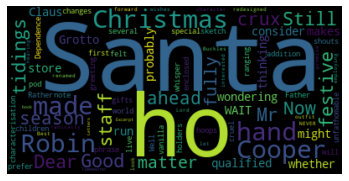

In [153]:
word_cloud = WordCloud().generate(email_body)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [154]:
example_corpus = nltk.corpus.gutenberg.words('melville-moby_dick.txt')
len(example_corpus)

260819

In [155]:
type(example_corpus)

nltk.corpus.reader.util.StreamBackedCorpusView

In [156]:
word_list = [''.join(word)for word in example_corpus]
novel_as_string = ''.join(word_list)

In [157]:
# novel_as_string

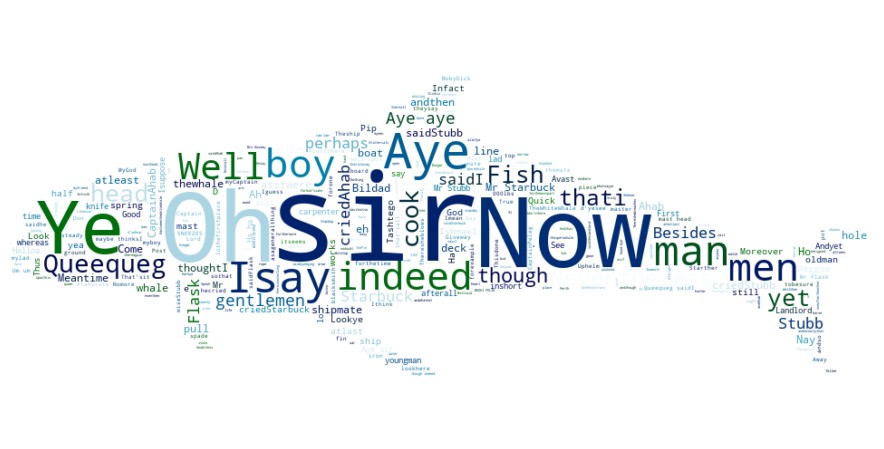

In [158]:
icon = Image.open(WHALE_FILE)
image_mask = Image.new(mode = 'RGB', size=icon.size, color = (255,255,255))
image_mask.paste(icon, box=icon)
rgb_array = np.array(image_mask)

word_cloud = WordCloud(mask=rgb_array, background_color='white', max_words=400, colormap='ocean').generate(novel_as_string)
plt.figure(figsize =(16,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [159]:
icon = Image.open(WHALE_FILE)

## Word Cloud for Ham and Spam E-mail

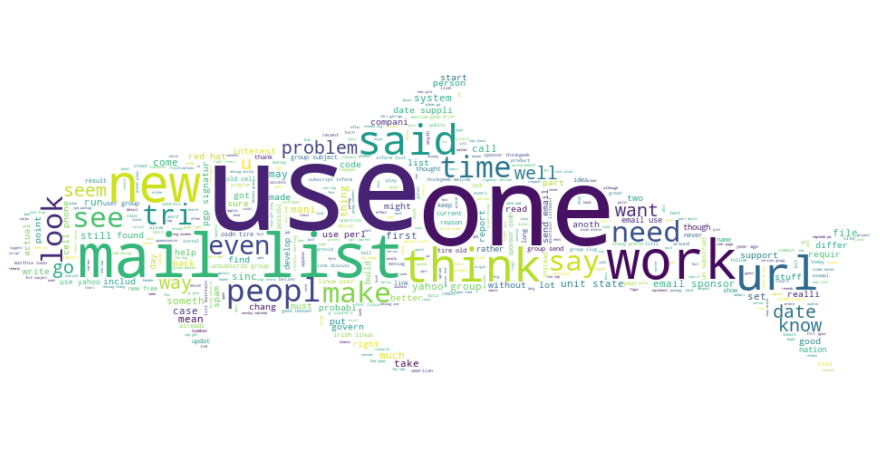

In [160]:
ham_str = ' '.join(flat_list_ham)

word_cloud = WordCloud(mask=rgb_array, background_color='white', max_words=2000).generate(ham_str)
plt.figure(figsize =(16,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

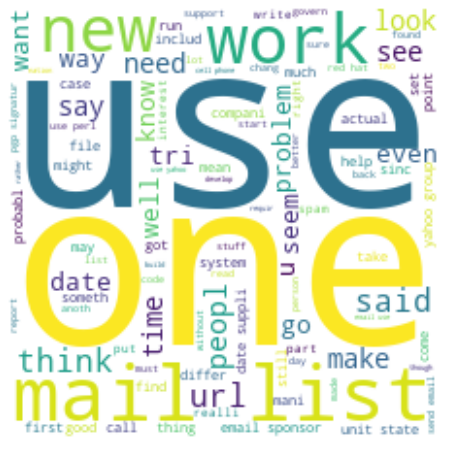

In [161]:
icon = Image.open(THUMBS_DOWN_FILE)
image_mask = Image.new(mode = 'RGB', size=icon.size, color = (255,255,255))
image_mask.paste(icon)


rgb_array = np.array(image_mask)


spam_str = ' '.join(flat_list_ham)

word_cloud = WordCloud(mask=rgb_array, background_color='white', max_words=2000).generate(ham_str)
plt.figure(figsize =(16,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Generate Vocubalary and Dictionary

In [162]:
stemmed_nested_list = data.MESSAGE.apply(clean_message_no_html)
flat_stemmed_list = [item for sublist in stemmed_nested_list for item in sublist]

/home/goodluck/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "http://www.post-gazette.com/columnists/20020905brian5
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [163]:
unique_words = pd.Series(flat_stemmed_list).value_counts()
print('Nr of unique words is:', unique_words.shape[0])
unique_words.head()

Nr of unique words is: 22875


http     11721
use       5634
list      4743
get       4676
email     4466
dtype: int64

In [164]:
frequent_words = unique_words[0:VOCAB_SIZE]
print('Most common words: \n', frequent_words[:10])

Most common words: 
 http     11721
use       5634
list      4743
get       4676
email     4466
one       4210
mail      4204
free      3479
time      3455
like      3191
dtype: int64


### Create Vocabulary Dataframe with a WORD_ID

In [165]:
word_ids = list(range(0, VOCAB_SIZE))

In [166]:
vocab = pd.DataFrame({'VOCAB_WORD': frequent_words.index.values}, index=word_ids)
vocab.index.name = 'WORD_ID'
vocab


,VOCAB_WORD
WORD_ID,
0,http
1,use
2,list
3,get
4,email
...,...
2495,accomplish
2496,kre
2497,rogu


### Save the Vocabulary as a CSV File


In [167]:
vocab.to_csv(WORD_ID_FILE, index_label=vocab.index.name, header = vocab.VOCAB_WORD.name)

### Checking if a word exists in the list of vocabulary 

In [168]:
any(vocab.VOCAB_WORD =='data')# in efficient way

True

In [169]:
'data' in set (vocab.VOCAB_WORD)

True

### Find the Longest number of words

In [170]:
# with for loopb
clean_email_length = []
for sublist in stemmed_nested_list:
    clean_email_length.append(len(sublist))

In [171]:
print(clean_email_length)

[217, 67, 140, 74, 82, 104, 104, 2, 120, 229, 421, 38, 255, 146, 319, 89, 50, 72, 3, 26, 53, 5, 226, 509, 35, 3, 276, 144, 6083, 36, 102, 109, 1460, 198, 40, 171, 44, 50, 250, 489, 40, 77, 41, 183, 62, 226, 50, 21, 52, 20, 312, 12, 47, 44, 1465, 342, 109, 247, 3, 28, 208, 664, 38, 119, 34, 81, 146, 13, 55, 0, 256, 130, 18, 65, 70, 1390, 44, 93, 0, 82, 1262, 38, 47, 72, 34, 0, 157, 110, 243, 72, 52, 184, 96, 217, 114, 208, 78, 1, 0, 2, 182, 333, 32, 38, 8, 169, 256, 63, 113, 184, 92, 67, 36, 1183, 78, 47, 65, 74, 14, 90, 75, 94, 18, 4, 231, 509, 256, 253, 105, 63, 204, 84, 221, 45, 15, 132, 104, 210, 252, 81, 18, 147, 192, 42, 80, 177, 255, 37, 329, 249, 166, 97, 102, 44, 215, 216, 26, 47, 157, 129, 92, 18, 161, 34, 14, 42, 52, 75, 56, 49, 25, 98, 63, 319, 119, 48, 255, 383, 27, 102, 90, 90, 81, 214, 65, 673, 98, 0, 50, 95, 55, 83, 114, 42, 0, 77, 79, 223, 0, 208, 41, 102, 2, 748, 2, 150, 131, 323, 44, 64, 129, 6, 38, 61, 28, 0, 255, 81, 178, 34, 68, 71, 38, 90, 15, 75, 90, 38, 1539, 12

In [172]:
# with list compresion
clean_email_length = [len(sublist)for sublist in stemmed_nested_list]
print('Number of words in the longest e-mail:', max(clean_email_length))

Number of words in the longest e-mail: 7354


In [173]:
print('email position in the list (and the dataframe)', np.argmax(clean_email_length))

email position in the list (and the dataframe) 4191


In [174]:
stemmed_nested_list[np.argmax(clean_email_length)]

['free',
 'trade',
 'free',
 'market',
 'proven',
 'abil',
 'lift',
 'whole',
 'societi',
 'poverti',
 'buff',
 'anybodi',
 'clear',
 'exampl',
 'origin',
 'messag',
 'rohit',
 'khare',
 'sent',
 'friday',
 'septemb',
 'pm',
 'subject',
 'sed',
 'world',
 'live',
 'comfort',
 'plenti',
 'half',
 'human',
 'race',
 'live',
 'less',
 'day',
 'neither',
 'stabl',
 'absolut',
 'correct',
 'perhap',
 'fundament',
 'thing',
 'realiz',
 'life',
 'earth',
 'today',
 'follow',
 'fascin',
 'document',
 'offici',
 'govern',
 'polici',
 'bear',
 'close',
 'read',
 'aspir',
 'wonder',
 'nation',
 'imperfect',
 'world',
 'war',
 'terror',
 'clash',
 'civil',
 'howev',
 'reveal',
 'clash',
 'insid',
 'civil',
 'battl',
 'futur',
 'muslim',
 'world',
 'struggl',
 'idea',
 'area',
 'america',
 'must',
 'excel',
 'recent',
 'lectur',
 'surpris',
 'success',
 'radio',
 'sawa',
 'new',
 'channel',
 'year',
 'old',
 'arab',
 'practic',
 'everi',
 'market',
 'enter',
 'near',
 'listenership',
 'amman',
 'ev

In [175]:
data.at[np.argmax(clean_email_length), 'MESSAGE']

'\n\n"Free trade and free markets have proven their ability to lift whole\n\nsocieties out of poverty"\n\nI\'m not a socio-political/history buff - does anybody have some clear\n\nexamples?\n\n\n\n\n\n----- Original Message -----\n\nFrom: "Rohit Khare" <khare@alumni.caltech.edu>\n\nTo: <fork@spamassassin.taint.org>\n\nSent: Friday, September 20, 2002 5:10 PM\n\nSubject: sed /s/United States/Roman Empire/g\n\n\n\n\n\n> > A world where some live in comfort and plenty, while half of the human\n\n> > race lives on less than $2 a day, is neither just nor stable.\n\n>\n\n> Absolutely correct. Perhaps the most fundamental thing to realize about\n\n> life on Earth today.\n\n>\n\n> The following is a fascinating document of official Government policy\n\n> that bears close reading. It is the aspirations of a wonderful nation in\n\n> an imperfect world.\n\n>\n\n> >  The war on terrorism is not a clash of civilizations. It does,\n\n> > however, reveal the clash inside a civilization, a battle for 

## Generate Features & a Sparse Matrix
### creating a dataFrame with one word per column 

In [176]:
word_coloumn_df= pd.DataFrame.from_records(stemmed_nested_list.tolist())
word_coloumn_df

,0,1,2,3,4,5,6,7,8,9,...,7344,7345,7346,7347,7348,7349,7350,7351,7352,7353
0,home,page,promot,reach,error,would,prefer,receiv,market,messag,...,None,None,None,None,None,None,None,None,None,None
1,dear,sir,madam,past,request,inform,discount,product,hope,find,...,None,None,None,None,None,None,None,None,None,None
2,privat,label,resel,host,plan,starter,planmids,plansupers,planpric,domain,...,None,None,None,None,None,None,None,None,None,None
3,winner,dear,travel,congratul,may,one,lucki,winner,may,spend,...,None,None,None,None,None,None,None,None,None,None
4,fortun,liter,made,new,marketplac,billion,n,merchandis,sold,ebay,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6891,date,fri,aug,robert,elz,said,today,cv,translat,yesterday,...,None,None,None,None,None,None,None,None,None,None
6892,url,http,date,suppli,art,letter,daili,wonder,dens,blog,...,None,None,None,None,None,None,None,None,None,None
6893,messag,mime,format,sign,conform,need,pgp,gpg,check,signatur,...,None,None,None,None,None,None,None,None,None,None
6894,thu,feb,peter,peltonen,wrote,line,rpm,leav,list,empti,...,None,None,None,None,None,None,None,None,None,None


In [177]:
word_coloumn_df.shape

(6896, 7354)

## Splitting Data into Training and Testing Dataset

In [178]:
X_train, X_test, y_train, y_test = train_test_split(word_coloumn_df, data.CATEGORY, test_size = 0.3, random_state = 42)

In [179]:
print('Number of training samples:', X_train.shape[0])
print('Fraction of training set:', X_train.shape[0]/ word_coloumn_df.shape[0])

Number of training samples: 4827
Fraction of training set: 0.6999709976798144


In [180]:
X_train.index.name = X_train.index.name = 'DOC_ID'
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7344,7345,7346,7347,7348,7349,7350,7351,7352,7353
DOC_ID,,,,,,,,,,,,,,,,,,,,,
1294,new,vigor,herbal,love,enhanc,new,straight,om,lab,offer,...,None,None,None,None,None,None,None,None,None,None
6472,url,http,date,bath,chronicl,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5792,martin,adamson,wrote,two,demonstr,head,march,san,francisco,critic,...,None,None,None,None,None,None,None,None,None,None
6438,inlin,fri,feb,matthia,saou,wrote,upon,time,harri,wrote,...,None,None,None,None,None,None,None,None,None,None
4922,mon,sep,russel,turpin,wrote,better,idea,invit,afternoon,cruis,...,None,None,None,None,None,None,None,None,None,None


In [181]:
y_train


DOC_ID
1294    1
6472    0
5792    0
6438    0
4922    0
       ..
3772    0
5191    0
5226    0
5390    0
860     1
Name: CATEGORY, Length: 4827, dtype: int64

### Create a Sparse Matrix for the Training Data

In [182]:
word_index = pd.Index(vocab.VOCAB_WORD)

In [183]:
def make_sparse_matrix(df, indexed_words, labels):
    """
    Returns a sparse matrix with a dataframe
    
    df: A data frame with words in the columns with a document id as an index (X_train , X_test)
    indexed_words: index of words ordered by id
    labels: category as a series (y_train or y_test)
    """
    
    nr_rows = df.shape[0]
    nr_clumns = df.shape[1]
    word_set = set(indexed_words)
    
    dic_list = []
    
    for i in range(nr_rows):
        for j in range(nr_clumns):
            word = df.iat[i, j]
            if word in word_set:
                doc_id = df.index[i]
                word_id = indexed_words.get_loc(word)
                category = labels.at[doc_id]
                
                item = {'LABEL': category, 'DOC_ID':doc_id, 'OCCURENCE':1, 'WORD_ID':word_id}
                dic_list.append(item)
    
    return pd.DataFrame(dic_list)

In [185]:
%%time

sparse_trian_df = make_sparse_matrix(X_train, word_index, y_train)

CPU times: user 10min 47s, sys: 423 ms, total: 10min 47s
Wall time: 10min 48s


### Combine Occurences with Pandas groupby Method

In [187]:
train_grouped = sparse_trian_df.groupby(['DOC_ID', 'WORD_ID', 'LABEL']).sum()
train_grouped

OCCURENCE
DOC_ID WORD_ID LABEL           
0      2       1              1
       3       1              2
       4       1             10
       5       1              3
       6       1              3
...                         ...
6895   2197    0              1
       2232    0              1
       2290    0              1
       2293    0              1
       2461    0              1

[290320 rows x 1 columns]

In [188]:
vocab.at[0, 'VOCAB_WORD']

'http'

In [189]:
train_grouped = train_grouped.reset_index()
train_grouped.head()
train_grouped.tail()

,DOC_ID,WORD_ID,LABEL,OCCURENCE
290315,6895,2197,0,1
290316,6895,2232,0,1
290317,6895,2290,0,1
290318,6895,2293,0,1
290319,6895,2461,0,1


### Save Data as Txt File

In [190]:
np.savetxt(TRAINING_DATA_FILE, train_grouped, fmt='%d')

In [191]:
%%time

sparse_test_df = make_sparse_matrix(X_test, word_index, y_test)

CPU times: user 4min 41s, sys: 268 ms, total: 4min 41s
Wall time: 4min 41s


In [192]:
sparse_test_df.shape

(221794, 4)

In [193]:
test_grouped = sparse_test_df.groupby(['DOC_ID', 'WORD_ID', 'LABEL']).sum().reset_index()

In [194]:
test_grouped.head()

,DOC_ID,WORD_ID,LABEL,OCCURENCE
0,8,0,1,3
1,8,1,1,1
2,8,3,1,1
3,8,9,1,1
4,8,13,1,1


In [195]:
np.savetxt(TEST_DATA_FILE, test_grouped, fmt='%d')